# Classification using FCN and CNN

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Input
from tensorflow.keras.models import Model

# Commonly used modules
import numpy as np
import os
import sys

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import IPython
from six.moves import urllib
%reload_ext tensorboard
print(tf.__version__)

2.3.1


The MNIST dataset contains 70,000 grayscale images of handwritten digits at a resolution of 28 by 28 pixels. The task is to take one of these images as input and predict the most likely digit contained in the image (along with a relative confidence in this prediction):
<img src="https://miro.medium.com/max/530/1*VAjYygFUinnygIx9eVCrQQ.png" width="500px" height="400px">
<img src="https://i.imgur.com/ITrm9x4.png" width="500px">

Now, we load the dataset. The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The *labels* are an array of integers, ranging from 0 to 9.

In [3]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

# reshape images to specify that it's a single channel
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

As we learned a fully connected neural network uses only a 1D Vector as Input data. So what we have to di is flatten out the existing pictures to a linear Data of 784 individual points:

In [4]:
image_vector_size  = train_images.shape[1]*train_images.shape[2]
print(image_vector_size)
X_train = train_images.reshape((-1, image_vector_size))
print(X_train.shape)

784
(60000, 784)


Display the first 5 images from the *training set* and display the class name below each image. Verify that the data is in the correct format and we're ready to build and train the network.

In [10]:
# Your Turn

<details>
    <summary> <b>Click here for one possible solution</b></summary>
    
```python
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
```
</details>


## Part 1: Classification of MNIST using Fully Connected Neural Network

Create a model that looks like this: 
    
<img src="Pictures/Class_FC.png" width="700px" > 

the activation on each hidden layer should be 'relu' and on the last layer 'softmax'

In [5]:
model = keras.Sequential()
model.add(Input(shape=(X_train.shape[1]), name='input'))
#YOUR TURN
# First hidden dense layer with 256 logits
model.add(Dense(256, activation='relu'))
# First hidden dense layer with 256 logits
model.add(Dense(128, activation='relu'))
# Third hidden dense layer with 65 logits
model.add(Dense(64, activation='relu'))
# output a softmax to squash the matrix into output probabilities
model.add(Dense(10, activation='softmax'))

<details>
<summary><b>Click here for one possible solution</b></summary>
    
```python
# First hidden dense layer with 256 logits
model.add(Dense(256, activation='relu'))
# First hidden dense layer with 256 logits
model.add(Dense(128, activation='relu'))
# Third hidden dense layer with 65 logits
model.add(Dense(64, activation='relu'))
# output a softmax to squash the matrix into output probabilities
model.add(Dense(10, activation='softmax'))
```
</details>


In [6]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


In [7]:
import datetime
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
history = model.fit(X_train, train_labels,validation_split=0.1, epochs=15,callbacks=[tensorboard_callback])

Epoch 1/15
   1/1688 [..............................] - ETA: 0s - loss: 101.6791 - accuracy: 0.0938WARNING:tensorflow:From C:\Users\phsc270152\Anaconda3\envs\tensorflow_2.1\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1688/1688 [==============================] - 13s 7ms/step - loss: 1.0742 - accuracy: 0.8751 - val_loss: 0.2610 - val_accuracy: 0.9322
Epoch 2/15
1688/1688 [==============================] - 11s 7ms/step - loss: 0.2342 - accuracy: 0.9379 - val_loss: 0.2062 - val_accuracy: 0.9480
Epoch 3/15
1688/1688 [==============================] - 12s 7ms/step - loss: 0.1849 - accuracy: 0.9498 - val_loss: 0.1504 - val_accuracy: 0.9602
Epoch 4/15
1688/1688 [==============================] - 11s 6ms/step - loss: 0.1531 - accuracy: 0.9585 - val_loss: 0.2180 - val_accuracy: 0.9447
Epoch 5/15
1688/1688 [===

In [11]:
%tensorboard --logdir logs #--port 6006 #--bind_all

Launching TensorBoard...

KeyboardInterrupt: 

In [12]:
print(test_images.shape)
test_images_fc = test_images.reshape(-1,784)
print(test_images_fc.shape, test_labels.shape)

test_loss, test_acc = model.evaluate(test_images_fc, test_labels)

print('Test accuracy:', test_acc)

(10000, 28, 28, 1)
(10000, 784) (10000,)
313/313 [==============================] - 1s 3ms/step - loss: 0.1440 - accuracy: 0.9732
Test accuracy: 0.9732000231742859


## Part 2: Classification of MNIST with Convolutional Neural Networks

Next, let's build a convolutional neural network (CNN) classifier to classify images of handwritten digits in the MNIST dataset with a twist where we test our classifier on high-resolution hand-written digits from outside the dataset.

We scale these values to a range of 0 to 1 before feeding to the neural network model. For this, we divide the values by 255. It's important that the *training set* and the *testing set* are preprocessed in the same way:

In [13]:
def preprocess_images(imgs): # should work for both a single image and multiple images
    if imgs.shape != [(28, 28, 1)] and imgs.ndim == 3:
        imgs = cv2.cvtColor(imgs, cv2.COLOR_RGB2GRAY)
        imgs = cv2.resize(imgs,(28,28))
        imgs = cv2.bitwise_not(imgs)
    sample_img = imgs if len(imgs.shape) == 2 else imgs[0]
    assert sample_img.shape in [(28, 28, 1), (28, 28)], sample_img.shape # make sure images are 28x28 and single-channel (grayscale)
    return imgs / 255.0

train_images = preprocess_images(train_images)
test_images = preprocess_images(test_images)

### Build the model

Now build a very simple Convolutional neural network that looks like this: 
<img src="Pictures/Class_CNN.png" width="700px" > 

Try to figure out the filter and the pooling sizes yourself using the picture above. all the activations inside the layers should be 'relu' and the last dense layer again 'softmax'

In [15]:
model = keras.Sequential()
#YOUR TURN
# 32 convolution filters used each of size 3x3
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
# choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# 64 convolution filters used each of size 3x3
model.add(Conv2D(64, (3, 3), activation='relu'))
# choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# flatten since too many dimensions, we only want a classification output
model.add(Flatten())
# fully connected to get all relevant data
model.add(Dense(128, activation='relu'))
# one more dropout
# output a softmax to squash the matrix into output probabilities
model.add(Dense(10, activation='softmax'))

<details>
<summary><b>Click here for one possible solution</b></summary>
    
```python
# 32 convolution filters used each of size 3x3
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
# choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# 64 convolution filters used each of size 3x3
model.add(Conv2D(64, (3, 3), activation='relu'))
# choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# flatten since too many dimensions, we only want a classification output
model.add(Flatten())
# fully connected to get all relevant data
model.add(Dense(128, activation='relu'))
# one more dropout
# output a softmax to squash the matrix into output probabilities
model.add(Dense(10, activation='softmax'))
```
</details>

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* - measures how accurate the model is during training, we want to minimize this with the optimizer.
* *Optimizer* - how the model is updated based on the data it sees and its loss function.
* *Metrics* - used to monitor the training and testing steps. "accuracy" is the fraction of images that are correctly classified.

In [16]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

### Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model—in this example, the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. We ask the model to make predictions about a test set—in this example, the `test_images` array. We verify that the predictions match the labels from the `test_labels` array. 

To start training,  call the `model.fit` method—the model is "fit" to the training data:

In [18]:
import datetime
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)


history = model.fit(train_images, train_labels, epochs=5,callbacks=[tensorboard_callback])

Epoch 1/5
 520/1875 [=======>......................] - ETA: 1:08 - loss: 0.2719 - accuracy: 0.9167

KeyboardInterrupt: 

In [19]:
%tensorboard --logdir logs --port 6006 --bind_all

Reusing TensorBoard on port 6006 (pid 13804), started 0:02:23 ago. (Use '!kill 13804' to kill it.)

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 98.68% on the training data.

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [36]:
print(test_images.shape)
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

(10000, 28, 28, 1)
313/313 [==============================] - 0s 1ms/step - loss: 0.0322 - accuracy: 0.9903
Test accuracy: 0.9902999997138977


In [37]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(test_images)
cm=confusion_matrix(test_labels,np.argmax(y_pred,axis=1))
print(cm)

[[ 977    1    0    0    0    0    1    1    0    0]
 [   0 1133    1    1    0    0    0    0    0    0]
 [   2    0 1023    1    0    0    0    6    0    0]
 [   0    0    1 1006    0    2    0    0    1    0]
 [   0    0    1    0  977    0    4    0    0    0]
 [   1    0    0    6    0  882    1    0    2    0]
 [   5    3    0    0    2    1  946    0    1    0]
 [   0    2    3    1    0    0    0 1020    0    2]
 [   2    0    2    6    0    1    1    2  957    3]
 [   0    0    0    4   13    5    0    5    0  982]]


Often times, the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy is an example of *overfitting*. In our case, the accuracy is better at 99.19%! This is, in part, due to successful regularization accomplished with the Dropout layers.

### Make predictions

With the model trained, we can use it to make predictions about some images. 

In [38]:
LABELS = [0,1,2,3,4,5,6,7,8,9]
INCLUDED_LABELS = [0,1,2,3,4,5,6,7,8,9]
def plot_image_with_bar(idx, preds, img, with_bar=True, subtitle=''):    
    from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
    
    
    def autolabel(rects,ax):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            perc = height*100
            ax.annotate('{:2.2f}%'.format(perc),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
    
    '''Get the values'''
    predictions_array = preds
    true_label = 1
    img = img
    #predictions_array, true_label, img = preds['pred'][idx], preds['true_label'][idx], img[idx]
    
    # Get the current axis
    f = plt.gcf()
    f.set_size_inches(18.5, 10.5)
    ax = plt.gca()

    font_size=16

    '''Plot the current image'''
    ax.imshow(img,cmap='gray')

    predicted_label = np.argmax(predictions_array)

    color = 'red'
    
    #ax.set_title("True: {}".format(LABELS[true_label]),
    #                          color='blue', fontsize=font_size)
    
    ax.set_xlabel("Pred: {} {:2.2f}% ".format(INCLUDED_LABELS[predicted_label],
                                100*np.max(predictions_array)),
                                color=color, fontsize=font_size)
    
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    
    ''' Create an divider and add the bar to the right'''   
    if with_bar:
        ax_divider = make_axes_locatable(ax)
        cax = ax_divider.append_axes("right", size="170%", pad="2%")
        ax.grid(False)
        
        ''' Plot the distribution'''
        pred_plot = cax.bar(INCLUDED_LABELS, predictions_array, color="#777777")
        
        ''' Here we check the if the indices are correct'''        
        pred_plot[predicted_label].set_color('red')       
        
        cax.set_xticks(np.arange(len(INCLUDED_LABELS)))
        cax.set_xticklabels(INCLUDED_LABELS,rotation=45,fontsize=font_size)
        cax.set_yticks([])
        cax.set_ylim(0.0,1.1)
        # add some additional information
        if subtitle != '':
            subtitle = '\n'+subtitle

        # put the y-values on top of the bar
        autolabel(pred_plot,cax) 

# Try it with your own Image
You can now try to predict on your images. Open paint for example and draw a number or something else. You then can read it into the Notebook by putting it in your workshop folder. 
Keep in mind that we trained our Neural Network on Images with the shape (28,28,1), you might have to resize your own image. (or use the preprocess_images function further up in the script ;) )

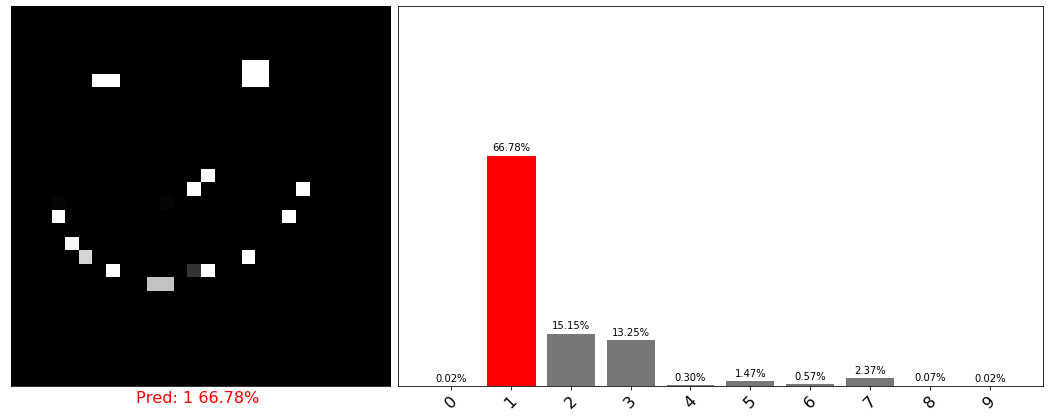

In [42]:
test = cv2.imread("smiley_test.png")
test = preprocess_images(test)

# plot the image to check if we read it in correctly
plt.imshow(test,cmap='gray')

# expanding the dimensions so it fits and prediction with our network
test = np.expand_dims(test,axis=2)
preds = model.predict(np.expand_dims(test,axis=0))

#take the argmax (position of the highest value) from the prediction array
plot_image_with_bar(0,preds[0],np.squeeze(test,axis=2))
#print(f"Your picture shows the Number {np.argmax(preds)} with {preds[0,np.argmax(preds)]} %")